Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Strojno učenje 1 2023/2024  
http://www.fer.unizg.hr/predmet/struce1

------------------------------

### Prva laboratorijska vježba: Linearna regresija

*Verzija: 1.0
Zadnji put ažurirano: 1. 10. 2021.*

(c) 2015-2023 Jan Šnajder, Domagoj Alagić 

Rok za predaju: **22. listopada 2023. u 23:59h**

------------------------------

### Pravila predaje
Predajom vježbe potvrđujete sljedeće točke:
1. Niste od drugoga primili pomoć pri rješavanju vježbe;
2. Atribuirali ste dijelove koda koji su preuzeti s interneta referencirajući ih u komentarima;
3. Niste koristili dijelove koda s interneta koji su specifični za laboratorijsku vježbu;
4. Niste koristili UI-asistente za kodiranje kao npr. GitHub Copilot (uključivo alate generativne UI, kao što je ChatGPT).

**Povreda bilo kojeg od gornjih pravila smatra se prekršajem te povlači akademske sankcije.**

### Upute

Prva laboratorijska vježba sastoji se od sedam zadataka. U nastavku slijedite upute navedene u ćelijama s tekstom. Rješavanje vježbe svodi se na **dopunjavanje ove bilježnice**: umetanja ćelije ili više njih **ispod** teksta zadatka, pisanja odgovarajućeg kôda te evaluiranja ćelija. 

Osigurajte da u potpunosti **razumijete** kôd koji ste napisali. Kod predaje vježbe, morate biti u stanju na zahtjev asistenta (ili demonstratora) preinačiti i ponovno evaluirati Vaš kôd. Nadalje, morate razumjeti teorijske osnove onoga što radite, u okvirima onoga što smo obradili na predavanju. Ispod nekih zadataka možete naći i pitanja koja služe kao smjernice za bolje razumijevanje gradiva (**nemojte pisati** odgovore na pitanja u bilježnicu). Stoga se nemojte ograničiti samo na to da riješite zadatak, nego slobodno eksperimentirajte. To upravo i jest svrha ovih vježbi.

Vježbe trebate raditi **samostalno**. Možete se konzultirati s drugima o načelnom načinu rješavanja, ali u konačnici morate sami odraditi vježbu. U protivnome vježba nema smisla.

In [66]:
# Učitaj osnovne biblioteke...
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%pylab inline

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\jrajcic\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['f', 'matrix', 'clf', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


### 1. Jednostavna regresija

Zadan je skup primjera $\mathcal{D}=\{(x^{(i)},y^{(i)})\}_{i=1}^4 = \{(0,4),(1,1),(2,2),(4,5)\}$. Primjere predstavite matricom $\mathbf{X}$ dimenzija $N\times n$ (u ovom slučaju $4\times 1$) i vektorom oznaka $\textbf{y}$, dimenzija $N\times 1$ (u ovom slučaju $4\times 1$), na sljedeći način:


In [67]:
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])
print(X)
print(y)

[[0]
 [1]
 [2]
 [4]]
[4 1 2 5]


### (a)

Proučite funkciju [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) iz biblioteke `sklearn` i upotrijebite je za generiranje matrice dizajna $\mathbf{\Phi}$ koja ne koristi preslikavanje u prostor više dimenzije (samo će svakom primjeru biti dodane *dummy* jedinice; $m=n+1$).


In [68]:
from audioop import bias
from sklearn.preprocessing import PolynomialFeatures 
# Vaš kôd ovdje
# include_bias=True [Default] dodaje svakom primjeru dummy jedinicu
ϕ = PolynomialFeatures(degree=1).fit_transform(X)
print(ϕ)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 4.]]


### (b)

Upoznajte se s modulom [`linalg`](http://docs.scipy.org/doc/numpy/reference/routines.linalg.html). Izračunajte težine $\mathbf{w}$ modela linearne regresije kao $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Zatim se uvjerite da isti rezultat možete dobiti izračunom pseudoinverza $\mathbf{\Phi}^+$ matrice dizajna, tj. $\mathbf{w}=\mathbf{\Phi}^+\mathbf{y}$, korištenjem funkcije [`pinv`](http://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.pinv.html).

In [69]:
from numpy import linalg
# Vaš kôd ovdje
print("Izračun težine w pomoću modula linalg:")
w = (linalg.inv(ϕ.T.dot(ϕ))).dot(ϕ.T).dot(y)
print(w)

# pivn je pseudo inverz matrice, dolazi iz modula linalg
print("Izračun težine w pomoću funkcije pinv:")
w = (linalg.pinv(ϕ)).dot(y)
print (w)

Izračun težine w pomoću modula linalg:
[2.2        0.45714286]
Izračun težine w pomoću funkcije pinv:
[2.2        0.45714286]


Radi jasnoće, u nastavku je vektor $\mathbf{x}$ s dodanom *dummy* jedinicom $x_0=1$ označen kao $\tilde{\mathbf{x}}$.

### (c)

Prikažite primjere iz $\mathcal{D}$ i funkciju $h(\tilde{\mathbf{x}})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$. Izračunajte pogrešku učenja prema izrazu $E(h|\mathcal{D})=\frac{1}{2}\sum_{i=1}^N(\tilde{\mathbf{y}}^{(i)} - h(\tilde{\mathbf{x}}^{(i)}))^2$. Možete koristiti funkciju srednje kvadratne pogreške [`mean_squared_error`]( http://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) iz modula [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics).

**Q:** Gore definirana funkcija pogreške $E(h|\mathcal{D})$ i funkcija srednje kvadratne pogreške nisu posve identične. U čemu je razlika? Koja je "realnija"?

Srednja kvadratna pogreška: 2.042857142857143


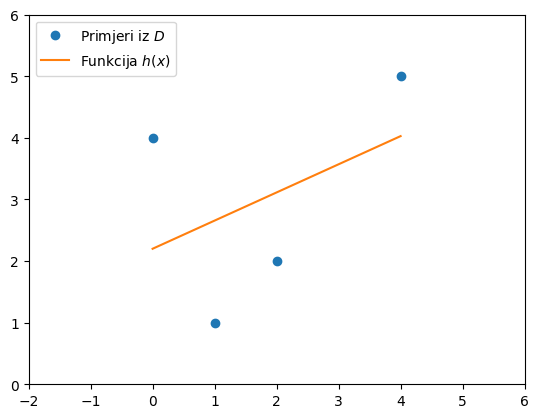

In [70]:
from sklearn.metrics import mean_squared_error 
# Vaš kôd ovdje

h = ϕ.dot(w) # h je hipoteza, tj. predikcija

# Prikaz primjera iz D i funkcije h(x):

plt.plot(X, y, 'o', X, h)
plt.legend(['Primjeri iz $D$', 'Funkcija $h(x)$'], loc='upper left')
plt.axis([-2, 6, 0, 6])

#Izračun srednje kvadratne pogreške:
err = mean_squared_error(y, h)
print("Srednja kvadratna pogreška:" , err)




### (d)

Uvjerite se da za primjere iz $\mathcal{D}$ težine $\mathbf{w}$ ne možemo naći rješavanjem sustava $\mathbf{w}=\mathbf{\Phi}^{-1}\mathbf{y}$, već da nam doista treba pseudoinverz.

**Q:** Zašto je to slučaj? Bi li se problem mogao riješiti preslikavanjem primjera u višu dimenziju? Ako da, bi li to uvijek funkcioniralo, neovisno o skupu primjera $\mathcal{D}$? Pokažite na primjeru.

In [71]:
# Vaš kôd ovdje
try:
    (np.linalg.inv(ϕ)).dot(y)
except:
    print ('Tezinu w ne možemo izračunati pomoću funkcije inv() jer matrica nije kvadratna.')

# Pise Q (da ne pisemo odgovore) i pise pokazite na primjeru. Pa sam se odlucio napraviti codblock za svaki slucaj... 
# Pokusavamo riješiti problem tako da radimo preslikavanje u višedimenzionalni prostor, Želimo se uvjerriti bili to uvijek funkcioniralo
try:
    ϕ_test = PolynomialFeatures(degree=3).fit_transform(X)
    print(ϕ_test)
    res = (np.linalg.inv(ϕ_test)).dot(y)
    print("Problem za ovaj ulazni skup primjera (D) bi se mogao riješiti preslikavanjem u višedimenzionalni prostor jer matrica ima inverz (kvadratna i punog ranga).")
except: 
    print ('Matrica nije punog ranga, tj. stupci su linearno ovisni, pa se u ovom slučaju problem ne bi mogao riješiti preslikavanjem u višedimenzionalni prostor.')


# Pokusavamo naci D za koji dano riješenje gore nebi valjalo, tj pokusavamo naci Matricu koja nije punog ranga kad se preslika u višedimenzionalni prostor
try: 
    D = np.array([
    [0, 0],
    [1, 1],
    [2, 2]
    ])

    matrix = PolynomialFeatures(degree=1).fit_transform(D)
    print(matrix)
    print("Matrix shape: ", matrix.shape)
    print("Matrix rank: ", np.linalg.matrix_rank(matrix))
    np.linalg.inv(matrix)
except:
    print("Iako je matrica kvadratna (nakon sto smo je preslikali u višedimenzionalni prostor), nije punog ranga, tj. stupci su linearno ovisni, pa se u ovom slučaju problem ne bi mogao riješiti preslikavanjem u višedimenzionalni prostor.")



Tezinu w ne možemo izračunati pomoću funkcije inv() jer matrica nije kvadratna.
[[ 1.  0.  0.  0.]
 [ 1.  1.  1.  1.]
 [ 1.  2.  4.  8.]
 [ 1.  4. 16. 64.]]
Problem za ovaj ulazni skup primjera (D) bi se mogao riješiti preslikavanjem u višedimenzionalni prostor jer matrica ima inverz (kvadratna i punog ranga).
[[1. 0. 0.]
 [1. 1. 1.]
 [1. 2. 2.]]
Matrix shape:  (3, 3)
Matrix rank:  2
Iako je matrica kvadratna (nakon sto smo je preslikali u višedimenzionalni prostor), nije punog ranga, tj. stupci su linearno ovisni, pa se u ovom slučaju problem ne bi mogao riješiti preslikavanjem u višedimenzionalni prostor.


### (e) 

Proučite klasu [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model). Provjerite jesu li težine koje izračunava ta funkcija (dostupne pomoću atributa `coef_` i `intercept_`) jednake onima koje ste izračunali gore. Ako nisu, prilagodite kôd tako da jest.

**NB:** Obratite pozornost na to kako klase [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) i [`PolynomialFeatures`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) koriste pomak i osigurajte da ga ne dodajete više puta.

Izračunajte predikcije modela (metoda `predict`) i uvjerite se da je pogreška učenja identična onoj koju ste ranije izračunali.

In [72]:
from sklearn.linear_model import LinearRegression
# Vaš kôd ovdje

# Iz prethodnog dijela zadatka
print("Izračun težine w koristenjem izraza iz b) dijela zadatka:")
w = (linalg.pinv(ϕ)).dot(y)
h = np.dot(ϕ, w)
err = mean_squared_error(y, h)
print("w: ", w)
print("h: ", h)
print("E(h|D): ", err)


# Izračun težine w pomoću modula LinearRegression
print("Izračun težine w pomoću modula LinearRegression:")
lr = LinearRegression().fit(ϕ, y)
w = [lr.intercept_, lr.coef_[1]]
h = lr.predict(ϕ)
err = mean_squared_error(y, h)
print("w: ", w)
print("h: ", h)
print("E(h|D): ", err)

Izračun težine w koristenjem izraza iz b) dijela zadatka:
w:  [2.2        0.45714286]
h:  [2.2        2.65714286 3.11428571 4.02857143]
E(h|D):  2.042857142857143
Izračun težine w pomoću modula LinearRegression:
w:  [2.2, 0.45714285714285713]
h:  [2.2        2.65714286 3.11428571 4.02857143]
E(h|D):  2.042857142857143


### 2. Polinomijalna regresija i utjecaj šuma

### (a)

Razmotrimo sada regresiju na većem broju primjera. Definirajte funkciju `make_labels(X, f, noise=0)` koja uzima matricu neoznačenih primjera $\mathbf{X}_{N\times n}$ te generira vektor njihovih oznaka $\mathbf{y}_{N\times 1}$. Oznake se generiraju kao $y^{(i)} = f(x^{(i)})+\mathcal{N}(0,\sigma^2)$, gdje je $f:\mathbb{R}^n\to\mathbb{R}$ stvarna funkcija koja je generirala podatke (koja nam je u stvarnosti nepoznata), a $\sigma$ je standardna devijacija Gaussovog šuma, definirana parametrom `noise`. Za generiranje šuma možete koristiti funkciju [`numpy.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). 

Generirajte skup za učenje od $N=50$ primjera uniformno distribuiranih u intervalu $[-5,5]$ pomoću funkcije $f(x) = 5 + x -2 x^2 -5 x^3$ uz šum  $\sigma=200$:

In [73]:
from numpy.random import normal
         
def make_labels(X, f, noise=0):
    # Vaš kôd ovdje
    return (f(X) + normal(0, noise, (X.shape[0],1))) 



In [74]:
def make_instances(x1, x2, N) :
    return np.array([np.array([x]) for x in np.linspace(x1,x2,N)])

In [75]:
# Vaš kôd ovdje
# Generiranje skupa podataka 
N, x1, x2 = 50, -5, 5
X = make_instances(x1, x2, N)
print(X)

def f(x):
    return 5 + x - 2*(x**2) - 5*(x**3)

y = make_labels(X, f, noise=200)
# print(y)

[[-5.        ]
 [-4.79591837]
 [-4.59183673]
 [-4.3877551 ]
 [-4.18367347]
 [-3.97959184]
 [-3.7755102 ]
 [-3.57142857]
 [-3.36734694]
 [-3.16326531]
 [-2.95918367]
 [-2.75510204]
 [-2.55102041]
 [-2.34693878]
 [-2.14285714]
 [-1.93877551]
 [-1.73469388]
 [-1.53061224]
 [-1.32653061]
 [-1.12244898]
 [-0.91836735]
 [-0.71428571]
 [-0.51020408]
 [-0.30612245]
 [-0.10204082]
 [ 0.10204082]
 [ 0.30612245]
 [ 0.51020408]
 [ 0.71428571]
 [ 0.91836735]
 [ 1.12244898]
 [ 1.32653061]
 [ 1.53061224]
 [ 1.73469388]
 [ 1.93877551]
 [ 2.14285714]
 [ 2.34693878]
 [ 2.55102041]
 [ 2.75510204]
 [ 2.95918367]
 [ 3.16326531]
 [ 3.36734694]
 [ 3.57142857]
 [ 3.7755102 ]
 [ 3.97959184]
 [ 4.18367347]
 [ 4.3877551 ]
 [ 4.59183673]
 [ 4.79591837]
 [ 5.        ]]


Prikažite taj skup funkcijom [`scatter`](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter).

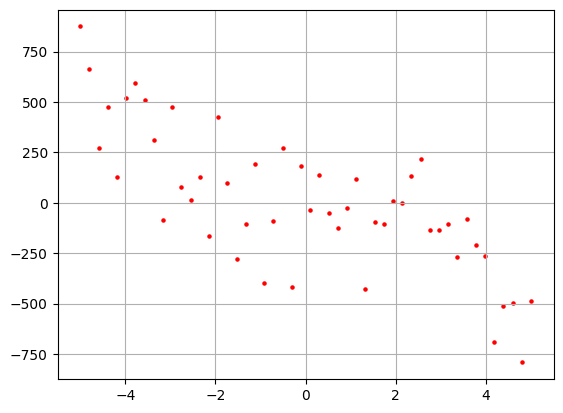

In [76]:
# Vaš kôd ovdje

plt.grid(True)
plt.scatter(X, y, color='red', s=5)

### (b)

Trenirajte model polinomijalne regresije stupnja $d=3$. Na istom grafikonu prikažite naučeni model $h(\mathbf{x})=\mathbf{w}^\intercal\tilde{\mathbf{x}}$ i primjere za učenje. Izračunajte pogrešku učenja modela.

Srednja kvadratna pogreška: 38570.238632800916


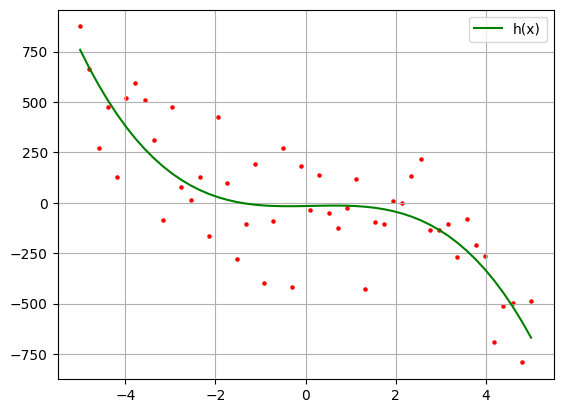

In [77]:
# Vaš kôd ovdje
# Izracun - postupak iz 1. a) i b) dijela zadatka
d = 3
ϕ = PolynomialFeatures(degree=d).fit_transform(X)
w = (linalg.pinv(ϕ)).dot(y)
h = np.dot(ϕ, w)

# Prikaz - postupak iz 2. a) dijela zadatka
plt.grid(True)
plt.scatter(X, y, color='red', s=5)
plt.plot(X, h, color='green', label='h(x)')
plt.legend(loc='upper right')
err = mean_squared_error(y, h)
print("Srednja kvadratna pogreška:" , err)

### 3. Odabir modela

### (a)

Na skupu podataka iz zadatka 2 trenirajte pet modela linearne regresije $\mathcal{H}_d$ različite složenosti, gdje je $d$ stupanj polinoma, $d\in\{1,3,5,10,20\}$. Prikažite na istome grafikonu skup za učenje i funkcije $h_d(\mathbf{x})$ za svih pet modela (preporučujemo koristiti `plot` unutar `for` petlje). Izračunajte pogrešku učenja svakog od modela.

**Q:** Koji model ima najmanju pogrešku učenja i zašto?

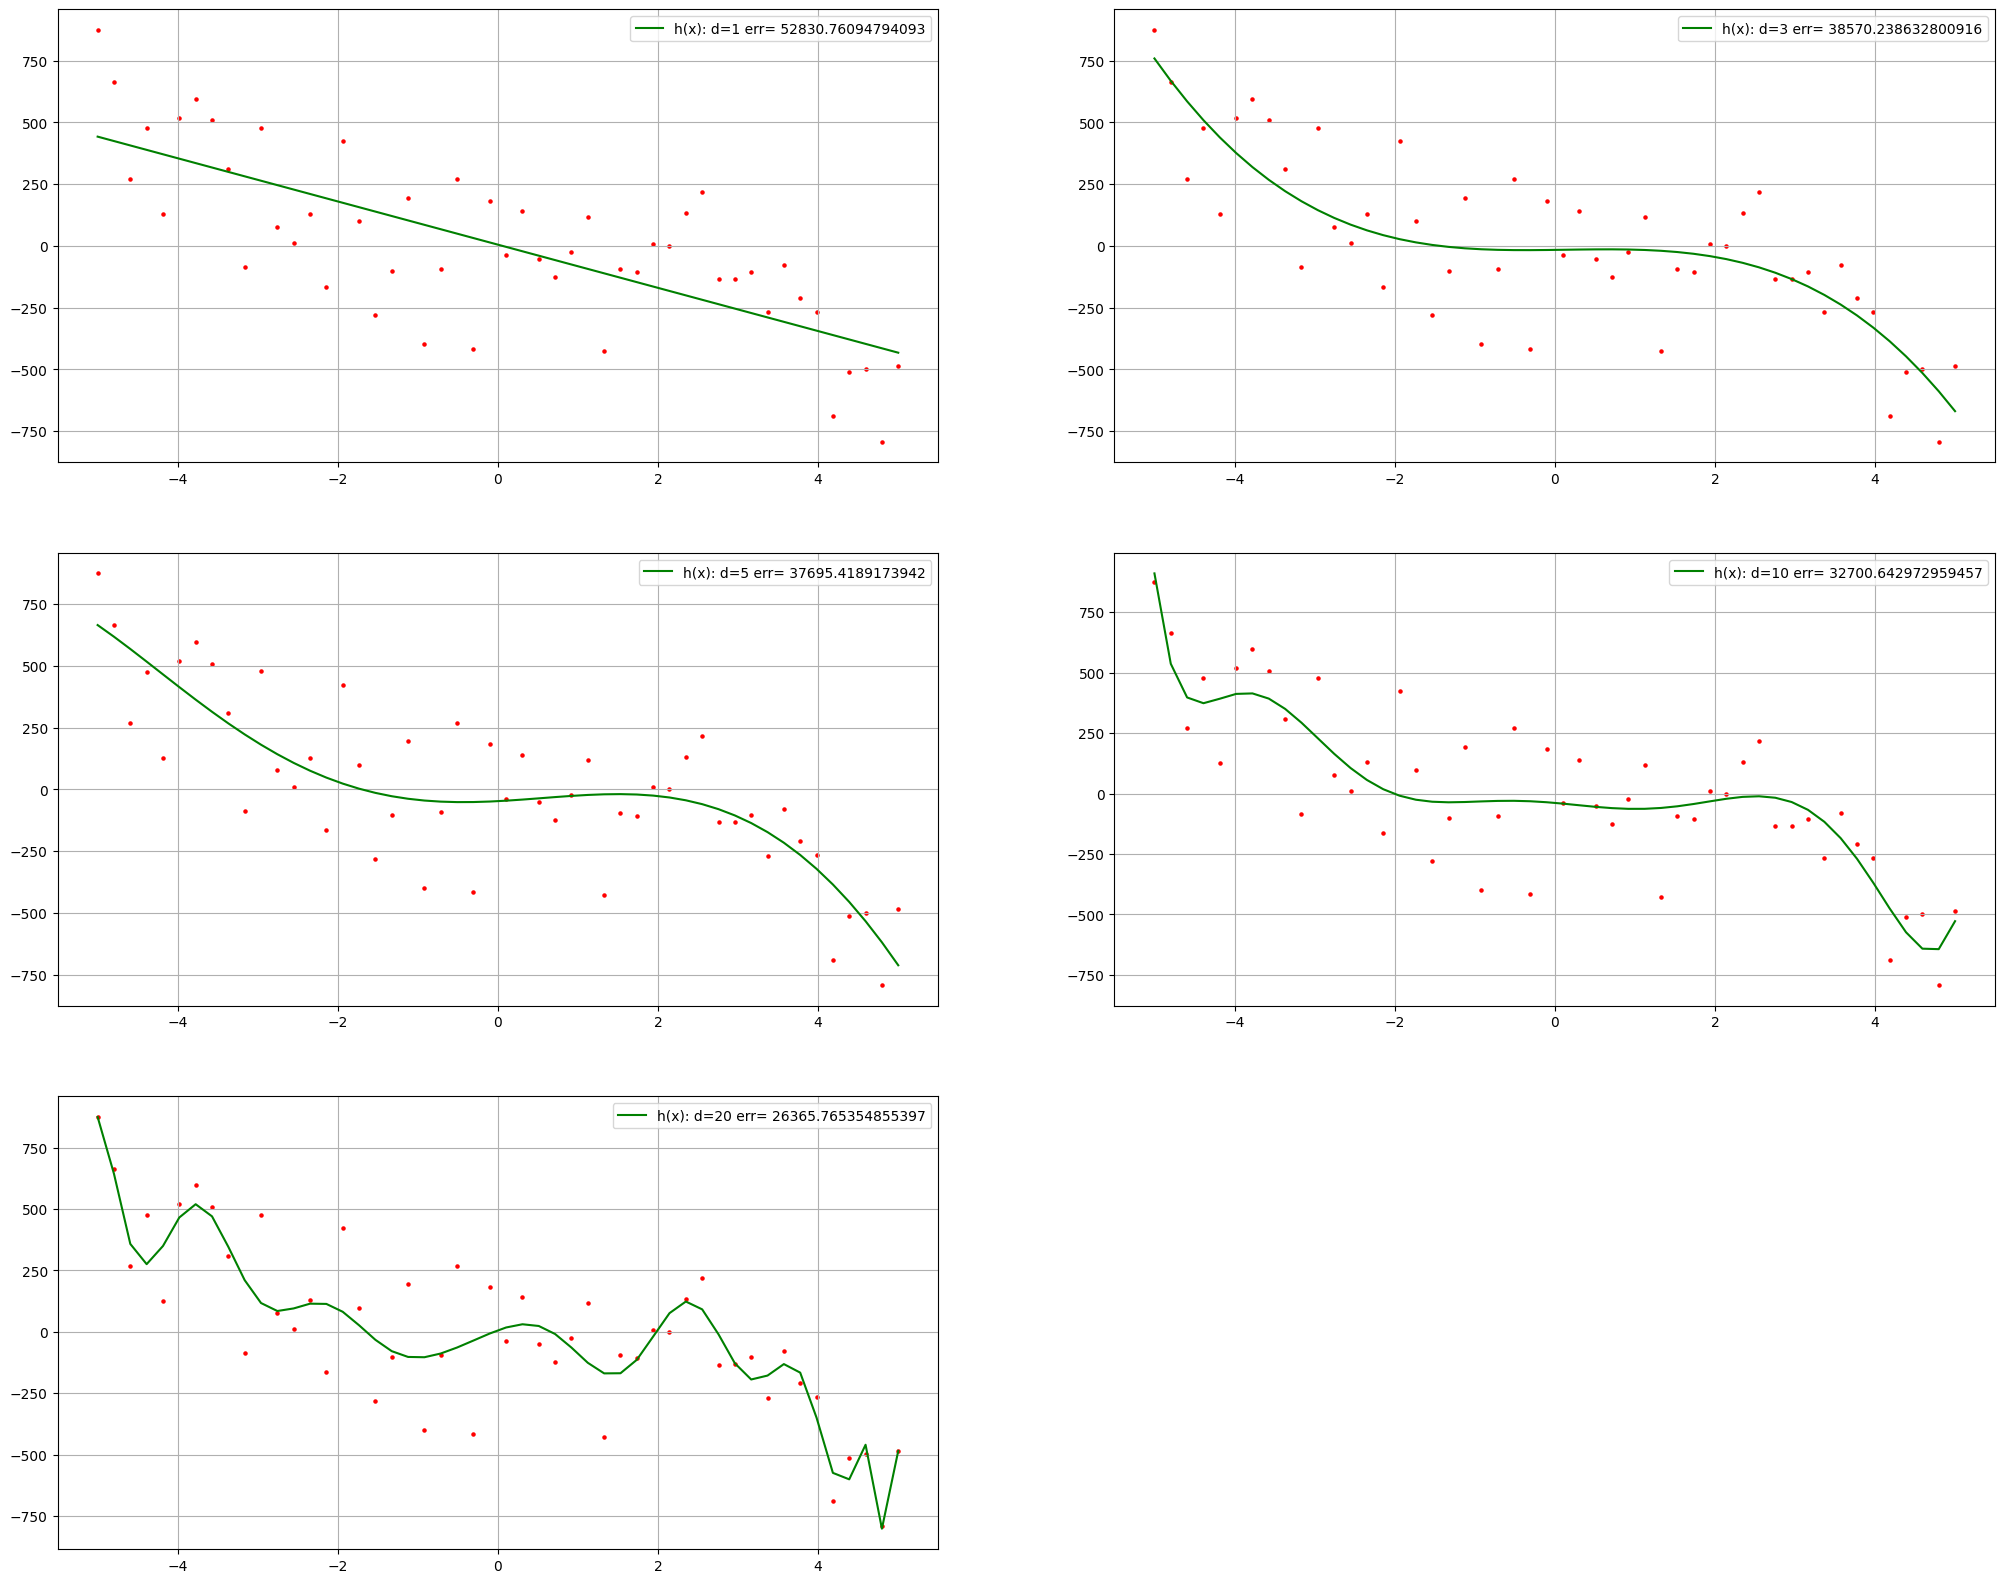

In [78]:
# Vaš kôd ovdje
fig = plt.figure(figsize=(25, 20))
d_arr = [1, 3, 5, 10, 20]

for d in d_arr:
    # Izracun - postupak iz 1. a) i b) dijela zadatka
    ϕ = PolynomialFeatures(degree=d).fit_transform(X)
    w = (linalg.pinv(ϕ)).dot(y)
    h = np.dot(ϕ, w)

    # Prikaz - postupak iz 2. a) dijela zadatka
    err = mean_squared_error(y, h)
    fig.add_subplot(3, 2, d_arr.index(d) + 1)

    plt.grid(True)
    plt.scatter(X, y, s=5, color='red') 
    plt.plot(X, h, label='h(x): d=%d err= ' % d + str(err), color='green')
    plt.legend(loc='upper right')

### (b)

Razdvojite skup primjera iz zadatka 2 pomoću funkcije [`model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) na skup za učenja i skup za ispitivanje u omjeru 1:1. Prikažite na jednom grafikonu pogrešku učenja i ispitnu pogrešku za modele polinomijalne regresije $\mathcal{H}_d$, sa stupnjem polinoma $d$ u rasponu $d\in [1,2,\ldots,20]$. Budući da kvadratna pogreška brzo raste za veće stupnjeve polinoma, umjesto da iscrtate izravno iznose pogrešaka, iscrtajte njihove logaritme.

**NB:** Podjela na skupa za učenje i skup za ispitivanje mora za svih dvadeset modela biti identična.

**Q:** Je li rezultat u skladu s očekivanjima? Koji biste model odabrali i zašto?

**Q:** Pokrenite iscrtavanje više puta. U čemu je problem? Bi li problem bio jednako izražen kad bismo imali više primjera? Zašto?

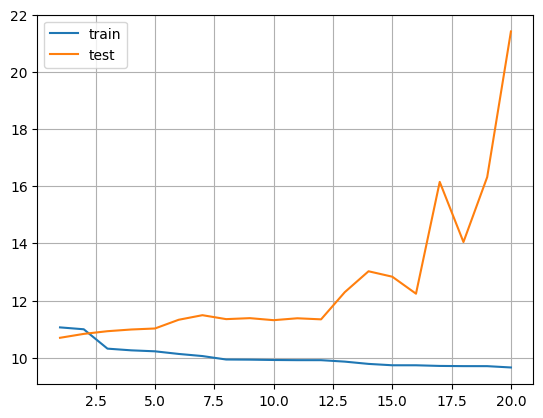

In [79]:
from sklearn.model_selection import train_test_split
# Vaš kôd ovdje
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
err_train, err_test = [], []
for d in range(1, 21):
    # Izracun - postupak iz 1. a) i b) dijela zadatka
    # Trening
    ϕ_train = PolynomialFeatures(degree=d).fit_transform(X_train)
    w_train = (linalg.pinv(ϕ_train)).dot(y_train)
    h_train = np.dot(ϕ_train, w_train)
    err_train.append(mean_squared_error(y_train, h_train))
    
    # Test
    ϕ_test = PolynomialFeatures(degree=d).fit_transform(X_test)
    h_test = np.dot(ϕ_test, w_train)
    err_test.append(mean_squared_error(y_test, h_test))

    
# Prikaz - postupak iz 2. a) dijela zadatka
plt.grid(True)
plt.plot(range(1,21), [np.log(e) for e in err_train], label = 'train')
plt.plot(range(1,21), [np.log(e) for e in err_test], label = 'test')
plt.legend(loc='best')



### (c)

Točnost modela ovisi o (1) njegovoj složenosti (stupanj $d$ polinoma), (2) broju primjera $N$, i (3) količini šuma. Kako biste to analizirali, nacrtajte grafikone pogrešaka kao u 3b, ali za različit $N\in$ (trećina, dvije trećine, sve) i količine šuma $\sigma\in\{100,200,500\}$ (ukupno 9 grafikona). Upotrijebite funkciju [`subplots`](http://matplotlib.org/examples/pylab_examples/subplots_demo.html) kako biste pregledno posložili grafikone u tablicu $3\times 3$. Podatci se generiraju na isti način kao u zadatku 2.

**NB:** Pobrinite se da svi grafikoni budu generirani nad usporedivim skupovima podataka, na sljedeći način. Generirajte najprije svih 1000 primjera, podijelite ih na skupove za učenje i skupove za ispitivanje (dva skupa od po 500 primjera). Zatim i od skupa za učenje i od skupa za ispitivanje načinite tri različite verzije, svaka s drugačijom količinom šuma (ukupno 2x3=6 verzija podataka). Kako bi simulirali veličinu skupa podataka, od tih dobivenih 6 skupova podataka uzorkujte trećinu, dvije trećine i sve podatke. Time ste dobili 18 skupova podataka -- skup za učenje i za testiranje za svaki od devet grafova.

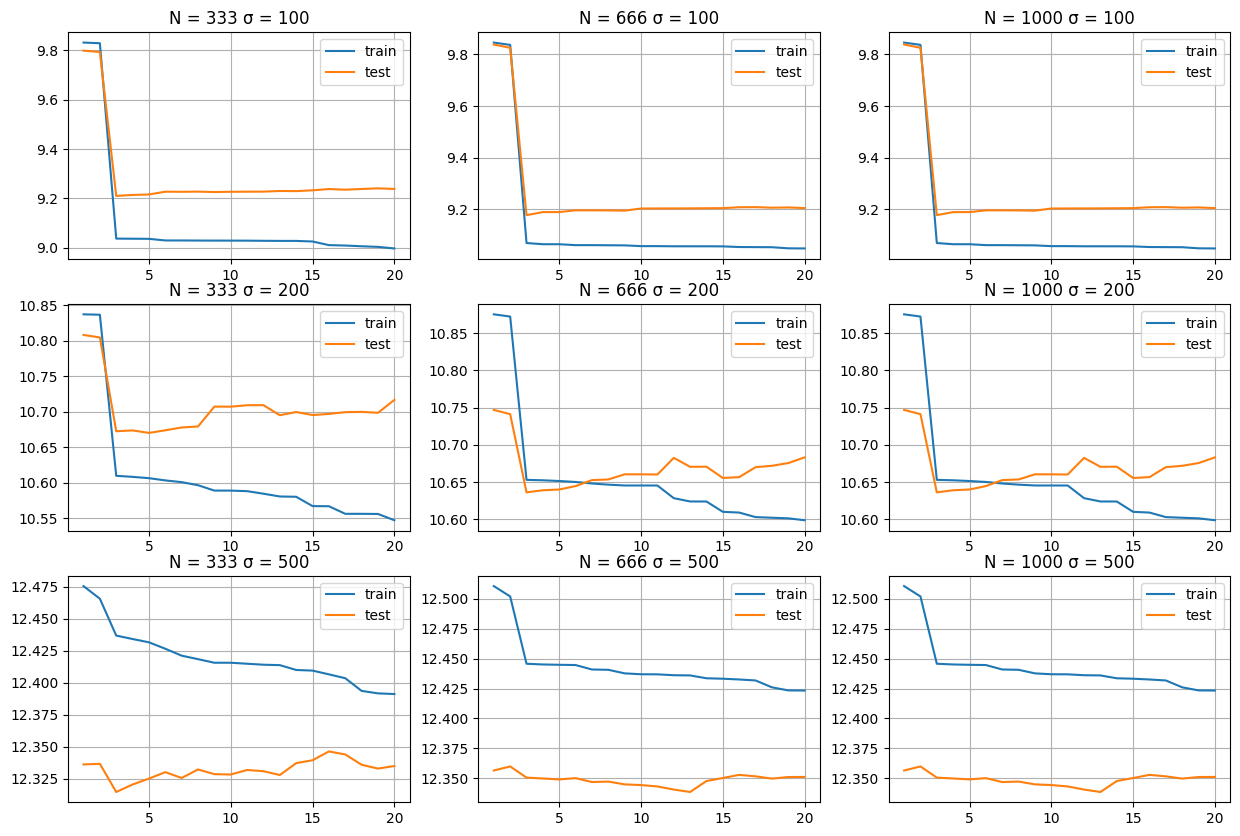

In [80]:
# Vaš kôd ovdje
N = [int(1000 * i / 3) for i in range(1, 3+1)]
sigma_arr = [100, 200, 500]
fig = plt.figure(figsize=(15, 10))

X = make_instances(-5, 5, max(N))
X_train, X_test = train_test_split(X, test_size=0.5)


for sigma in sigma_arr:
    y_train, y_test = make_labels(X_train, f, sigma), make_labels(X_test, f, sigma)

    for n in N:
        # Izracun isit kao u 3. b) dijelu zadatka
        err_train, err_test = [], []
        for d in range(1, 21):
            # Izracun - postupak iz 1. a) i b) dijela zadatka
            # Trening
            ϕ_train = PolynomialFeatures(degree=d).fit_transform(X_train[:n])
            w_train = (linalg.pinv(ϕ_train)).dot(y_train[:n])
            h_train = np.dot(ϕ_train, w_train)
            err_train.append(mean_squared_error(y_train[:n], h_train))
            
            # Test
            ϕ_test = PolynomialFeatures(degree=d).fit_transform(X_test[:n])
            h_test = np.dot(ϕ_test, w_train)
            err_test.append(mean_squared_error(y_test[:n], h_test))
            
        # # Prikaz - postupak iz 2. a) dijela zadatka
        fig.add_subplot(3, 3, sigma_arr.index(sigma) * 3 + N.index(n) + 1)
        plt.grid(True)
        plt.title('N = ' + str(n) + ' σ = ' + str(sigma))
        plt.plot(range(1,21), [np.log(e) for e in err_train], label = 'train')
        plt.plot(range(1,21), [np.log(e) for e in err_test], label = 'test')
        plt.legend(loc='upper right')
        




***Q:*** Jesu li rezultati očekivani? Obrazložite.

### 4. Regularizirana regresija

### (a)

U gornjim eksperimentima nismo koristili **regularizaciju**. Vratimo se najprije na primjer iz zadatka 1. Na primjerima iz tog zadatka izračunajte težine $\mathbf{w}$ za polinomijalni regresijski model stupnja $d=3$ uz L2-regularizaciju (tzv. *ridge regression*), prema izrazu $\mathbf{w}=(\mathbf{\Phi}^\intercal\mathbf{\Phi}+\lambda\mathbf{I})^{-1}\mathbf{\Phi}^\intercal\mathbf{y}$. Napravite izračun težina za regularizacijske faktore $\lambda=0$, $\lambda=1$ i $\lambda=10$ te usporedite dobivene težine.

**Q:** Kojih je dimenzija matrica koju treba invertirati?

**Q:** Po čemu se razlikuju dobivene težine i je li ta razlika očekivana? Obrazložite.

In [81]:
d, λ = 3, [0, 1, 10]
X = np.array([[0],[1],[2],[4]])
y = np.array([4,1,2,5])

ϕ = PolynomialFeatures(degree=d).fit_transform(X)
identity_matrix = np.eye(ϕ.shape[1])
identity_matrix[0][0] = 0

w_L2 = []
w_reg = lambda lam: np.dot(np.dot(np.linalg.inv(np.dot(ϕ.T, ϕ) + np.dot(lam, identity_matrix)), ϕ.T), y)
w_L2 = [w_reg(λ[i]) for i in range(len(λ))]

for i in range(0, 3):
    print(w_L2[i])


print("Dimenzije matrice koju je potrebno inventirati:", (np.dot(ϕ.T, ϕ) + np.dot(0, identity_matrix)).shape)
print("Dobivene težine će se razlikovati ovisno o vrijednosti regularizacijskog faktora λ.")


[ 4.         -5.91666667  3.375      -0.45833333]
[ 3.05696145 -0.69079365 -0.2831746   0.1445805 ]
[ 2.49444184 -0.15897295 -0.13423067  0.0815601 ]
Dimenzije matrice koju je potrebno inventirati: (4, 4)
Dobivene težine će se razlikovati ovisno o vrijednosti regularizacijskog faktora λ.


### (b)

Proučite klasu [`Ridge`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) iz modula [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model), koja implementira L2-regularizirani regresijski model. Parametar $\alpha$ odgovara parametru $\lambda$. Primijenite model na istim primjerima kao u prethodnom zadatku i ispišite težine $\mathbf{w}$ (atributi `coef_` i `intercept_`). Ponovno, pripazite na pomak.

**Q:** Jesu li težine identične onima iz zadatka 4a? Ako nisu, objasnite zašto je to tako i kako biste to popravili.

In [82]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

ϕ = PolynomialFeatures(degree=d, include_bias=False).fit_transform(X)
for el in λ:
    ridge = Ridge(alpha=el).fit(ϕ, y)
    print("λ = ", el, ": coef = ", ridge.coef_, "intercept = ", ridge.intercept_)


λ =  0 : coef =  [-5.91666667  3.375      -0.45833333] intercept =  3.9999999999999574
λ =  1 : coef =  [-0.69079365 -0.2831746   0.1445805 ] intercept =  3.0569614512471652
λ =  10 : coef =  [-0.15897295 -0.13423067  0.0815601 ] intercept =  2.494441843122973


### (c)

Vratimo se na slučaj $N=50$ slučajno generiranih primjera iz zadatka 2. Trenirajte modele polinomijalne regresije $\mathcal{H}_{\lambda,d}$ za $\lambda\in\{0,100\}$ i $d\in\{2,10\}$ (ukupno četiri modela). Skicirajte pripadne funkcije $h(\mathbf{x})$ i primjere (na jednom grafikonu; preporučujemo koristiti `plot` unutar `for` petlje).

**Q:** Jesu li rezultati očekivani? Obrazložite.

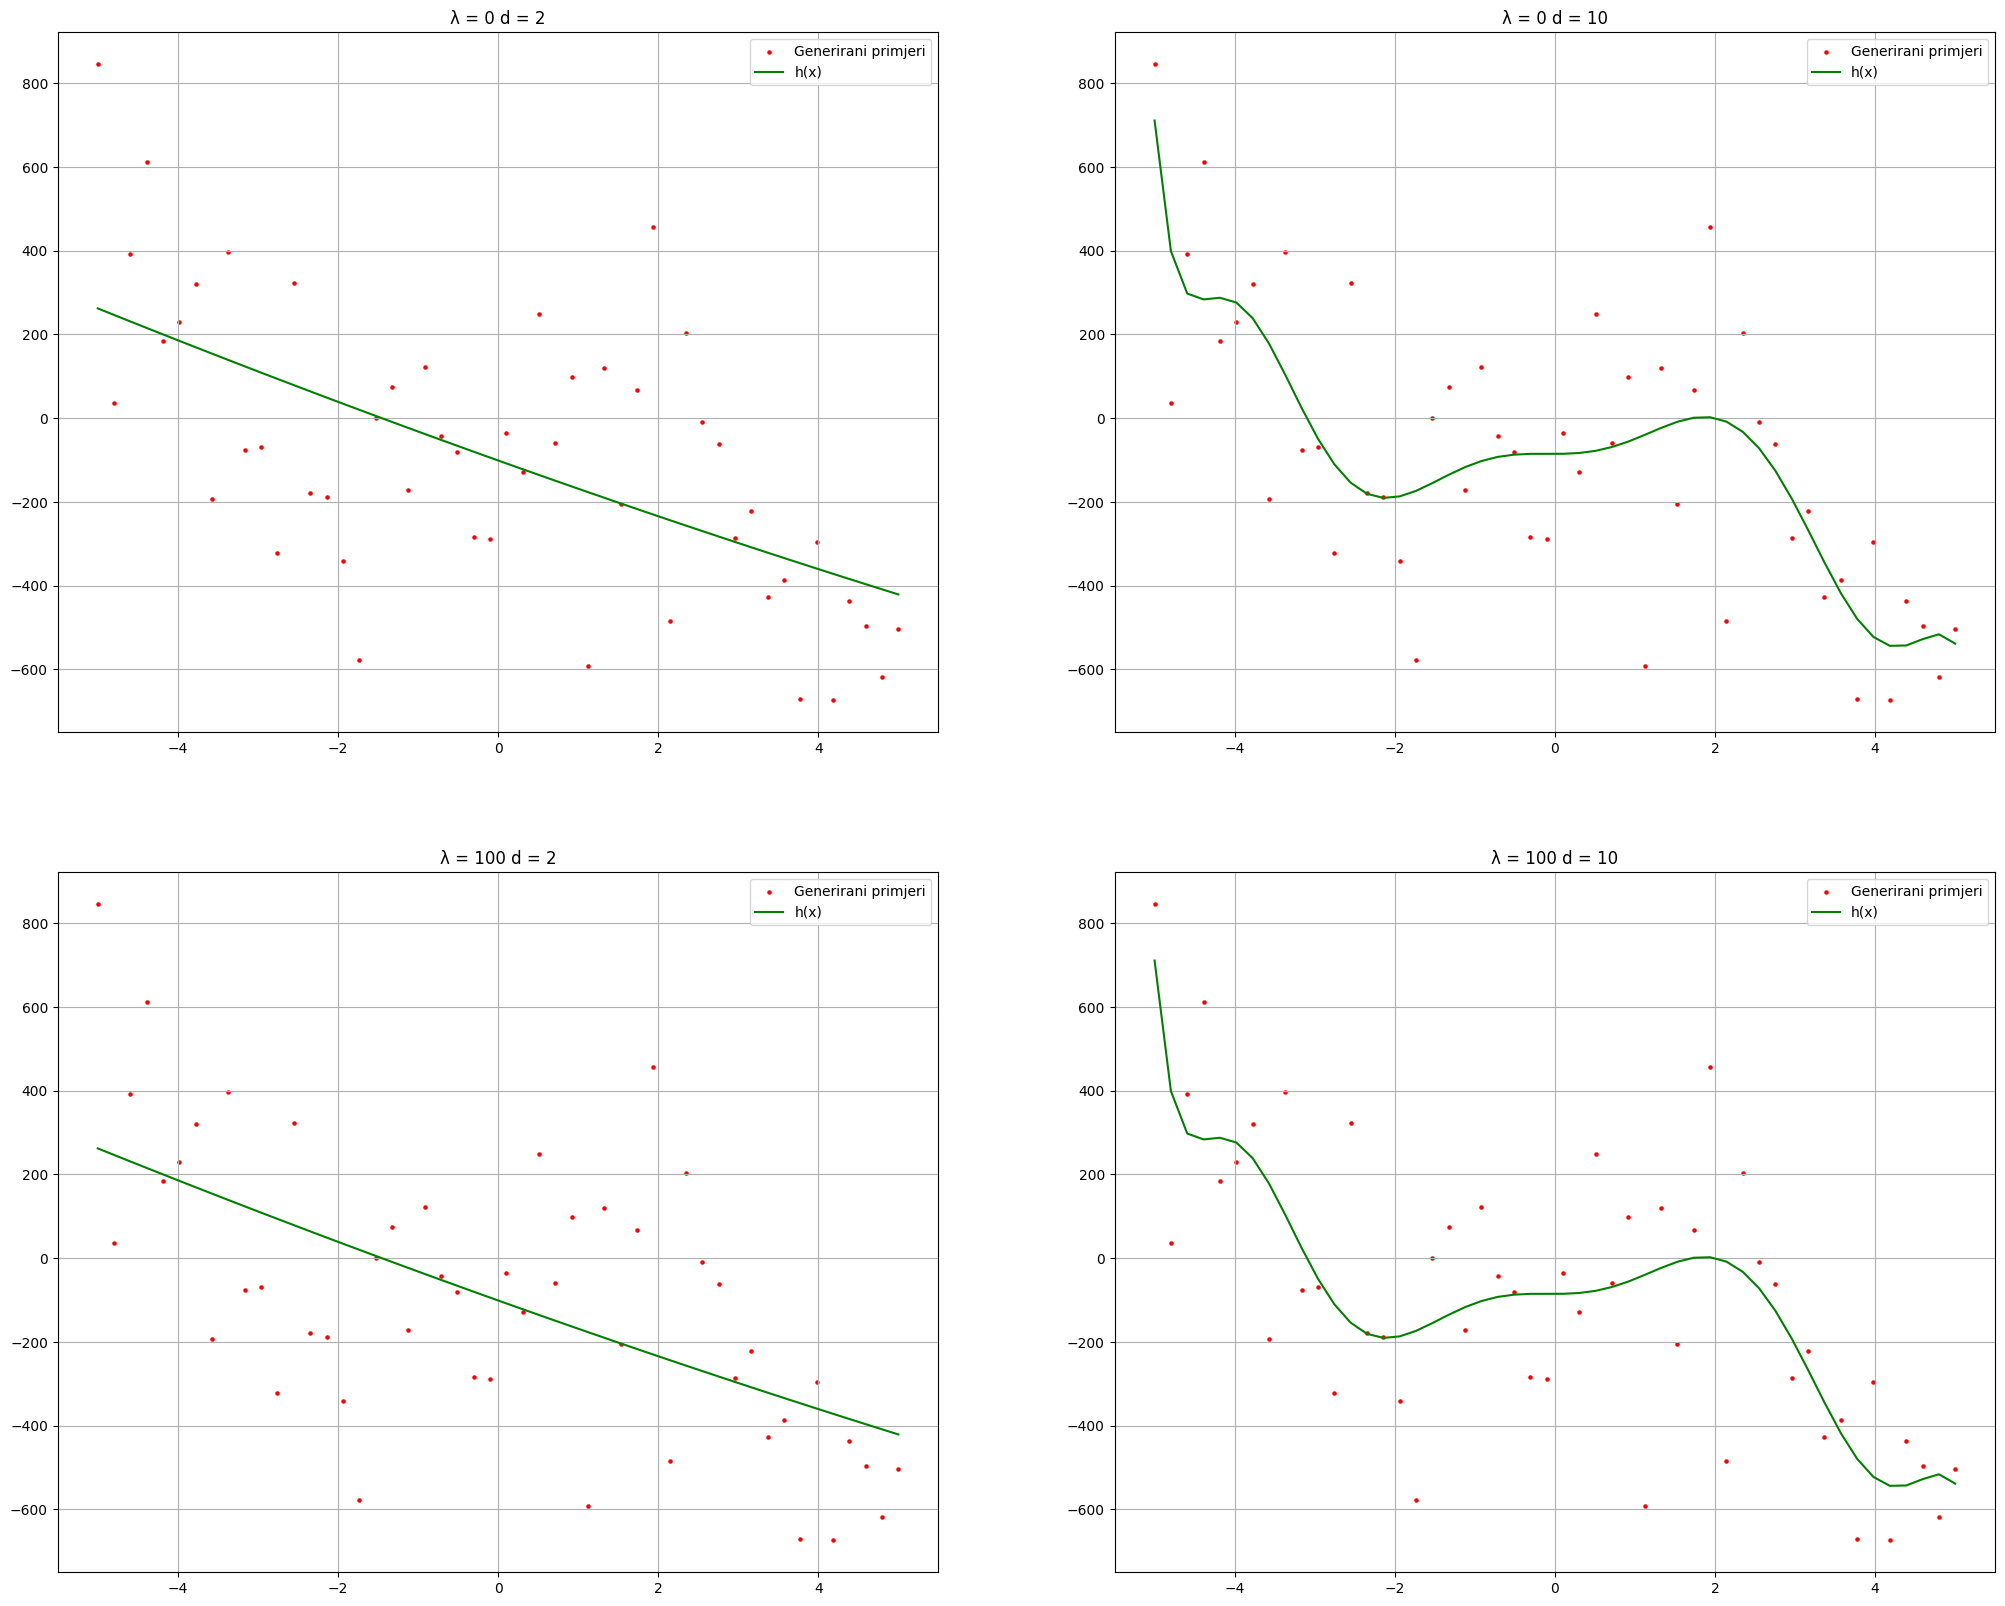

In [83]:
# Vaš kôd ovdje
N, λ_arr, d_arr = 50, [0, 100], [2, 10]
fig = plt.figure(figsize=(25, 20))
w_arr = []

X = make_instances(-5, 5, N)
y = make_labels(X, f, noise=200)


for λ in λ_arr:
    for d in d_arr:
        ϕ = PolynomialFeatures(degree=d).fit_transform(X)
        ridge = Ridge(alpha=el).fit(ϕ, y)
        h = ridge.predict(ϕ)
        
        fig.add_subplot(2, 2, λ_arr.index(λ) * 2 + d_arr.index(d) + 1)
        plt.grid(True)
        plt.title('λ = ' + str(λ) + ' d = ' + str(d))
        plt.scatter(X, y, s=5, color='red', label='Generirani primjeri')
        plt.plot(X, h, color='green', label='h(x)')
        plt.legend(loc='best')

        w_arr.append(w)


# print(w_arr[0] - w_arr[2])
# print(w_arr[1] - w_arr[3])

    


### (d)

Kao u zadataku 3b, razdvojite primjere na skup za učenje i skup za ispitivanje u omjeru 1:1. Prikažite krivulje logaritama pogreške učenja i ispitne pogreške u ovisnosti za model $\mathcal{H}_{d=10,\lambda}$, podešavajući faktor regularizacije $\lambda$ u rasponu $\lambda\in\{0,1,\dots,50\}$.

**Q:** Kojoj strani na grafikonu odgovara područje prenaučenosti, a kojoj podnaučenosti? Zašto?

**Q:** Koju biste vrijednosti za $\lambda$ izabrali na temelju ovih grafikona i zašto?


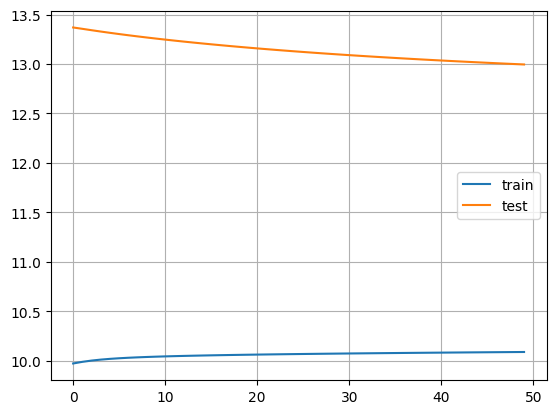

In [84]:
# Vaš kôd ovdje
N, λ_arr, d = 50, [i for i in range(1, 50 + 1)], 10

X = make_instances(-5, 5, N)
y = make_labels(X, f, noise=200)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=50)

err_train, err_test = [], []


for λ in λ_arr:
    ϕ = PolynomialFeatures(degree=d).fit_transform(X_train)
    identity_matrix = np.eye(ϕ.shape[1])
    identity_matrix[0][0] = 0
    w = np.dot(np.linalg.inv(np.dot(ϕ.T, ϕ) + np.dot(λ,identity_matrix)), np.dot(ϕ.T, y_train))
    h = np.dot(ϕ, w)
    err_train.append(mean_squared_error(y_train, h))

    ϕ = PolynomialFeatures(degree=d).fit_transform(X_test)
    h = np.dot(ϕ, w)
    err_test.append(mean_squared_error(y_test, h))


plt.grid(True)
plt.plot([np.log(e) for e in err_train], label = 'train')
plt.plot([np.log(e) for e in err_test], label = 'test')
plt.legend(loc='best')



### 5. L1-regularizacija i L2-regularizacija

Svrha regularizacije jest potiskivanje težina modela $\mathbf{w}$ prema nuli, kako bi model bio što jednostavniji. Složenost modela može se okarakterizirati normom pripadnog vektora težina $\mathbf{w}$, i to tipično L2-normom ili L1-normom. Za jednom trenirani model možemo izračunati i broj ne-nul značajki, ili L0-normu, pomoću sljedeće funkcije koja prima vektor težina $\mathbf{w}$:

In [85]:
def nonzeroes(coef, tol=1e-6): 
    return len(coef) - len(coef[np.isclose(0, coef, atol=tol)])

### (a)

Za ovaj zadatak upotrijebite skup za učenje i skup za testiranje iz zadatka 3b. Trenirajte modele **L2-regularizirane** polinomijalne regresije stupnja $d=5$, mijenjajući hiperparametar $\lambda$ u rasponu $\{1,2,\dots,100\}$. Za svaki od treniranih modela izračunajte L{0,1,2}-norme vektora težina $\mathbf{w}$ te ih prikažite kao funkciju od $\lambda$. Pripazite što točno šaljete u funkciju za izračun normi.

**Q:** Objasnite oblik obiju krivulja. Hoće li krivulja za $\|\mathbf{w}\|_2$ doseći nulu? Zašto? Je li to problem? Zašto?

**Q:** Za $\lambda=100$, koliki je postotak težina modela jednak nuli, odnosno koliko je model rijedak?

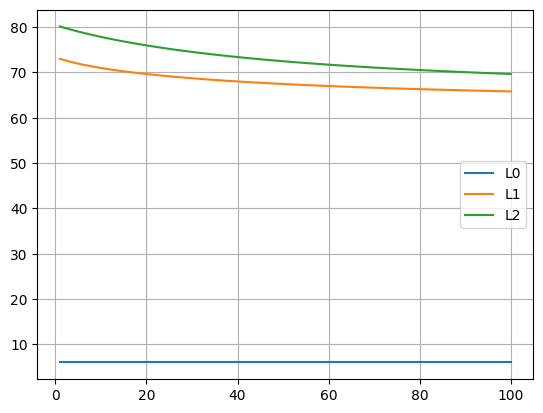

In [86]:
from sklearn.linear_model import Ridge
# Vaš kôd ovdje

N, λ_arr, d = 50, [i for i in range(1, 100 + 1)], 5
L0, L1, L2 = [], [], []

X = make_instances(-5, 5, N)
y = make_labels(X, f, noise=200)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

for λ in λ_arr:
    ϕ = PolynomialFeatures(degree=d).fit_transform(X_train)
    ridge = Ridge(alpha=λ).fit(ϕ, y_train)
    w = np.append(np.array([ridge.intercept_]), ridge.coef_)

    L0.append(nonzeroes(w))
    L1.append(np.sum(w))
    L2.append(np.sqrt(np.sum(np.square(w))))

plt.grid(True)
plt.plot(λ_arr, L0, label = 'L0')
plt.plot(λ_arr, L1, label = 'L1')
plt.plot(λ_arr, L2, label = 'L2')
plt.legend(loc='best')





### (b)

Glavna prednost L1-regularizirane regresije (ili *LASSO regression*) nad L2-regulariziranom regresijom jest u tome što L1-regularizirana regresija rezultira **rijetkim modelima** (engl. *sparse models*), odnosno modelima kod kojih su mnoge težine pritegnute na nulu. Pokažite da je to doista tako, ponovivši gornji eksperiment s **L1-regulariziranom** regresijom, implementiranom u klasi  [`Lasso`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) u modulu [`sklearn.linear_model`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model).

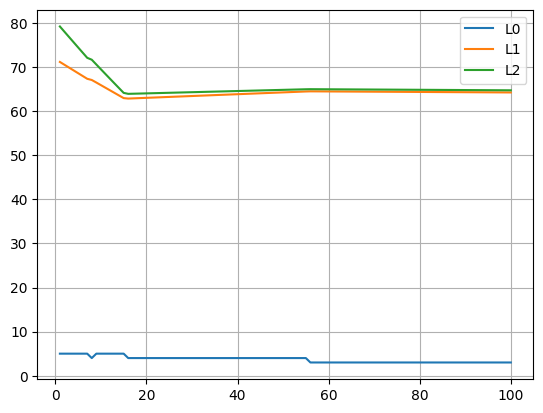

In [87]:
from sklearn.linear_model import Lasso
# Vaš kôd ovdje

N, λ_arr, d = 50, [i for i in range(1, 100 + 1)], 5
L0, L1, L2 = [], [], []

for λ in λ_arr:
    ϕ = PolynomialFeatures(degree=d).fit_transform(X_train)
    lasso = Lasso(alpha=λ).fit(ϕ, y_train)
    w = np.append(np.array([lasso.intercept_]), lasso.coef_)

    L0.append(nonzeroes(w))
    L1.append(np.sum(w))
    L2.append(np.sqrt(np.sum(np.square(w))))

plt.grid(True)
plt.plot(λ_arr, L0, label = 'L0')
plt.plot(λ_arr, L1, label = 'L1')
plt.plot(λ_arr, L2, label = 'L2')
plt.legend(loc='best')





### 6. Značajke različitih skala

Često se u praksi možemo susreti sa podatcima u kojima sve značajke nisu jednakih magnituda. Primjer jednog takvog skupa je regresijski skup podataka `grades` u kojem se predviđa prosjek ocjena studenta na studiju (1--5) na temelju dvije značajke: bodova na prijamnom ispitu (1--3000) i prosjeka ocjena u srednjoj školi. Prosjek ocjena na studiju izračunat je kao težinska suma ove dvije značajke uz dodani šum.

Koristite sljedeći kôd kako biste generirali ovaj skup podataka.

In [88]:
n_data_points = 500
np.random.seed(69)

# Generiraj podatke o bodovima na prijamnom ispitu koristeći normalnu razdiobu i ograniči ih na interval [1, 3000].
exam_score = np.random.normal(loc=1500.0, scale = 500.0, size = n_data_points) 
exam_score = np.round(exam_score)
exam_score[exam_score > 3000] = 3000
exam_score[exam_score < 0] = 0

# Generiraj podatke o ocjenama iz srednje škole koristeći normalnu razdiobu i ograniči ih na interval [1, 5].
grade_in_highschool = np.random.normal(loc=3, scale = 2.0, size = n_data_points)
grade_in_highschool[grade_in_highschool > 5] = 5
grade_in_highschool[grade_in_highschool < 1] = 1

# Matrica dizajna.
grades_X = np.array([exam_score,grade_in_highschool]).T

# Završno, generiraj izlazne vrijednosti.
rand_noise = np.random.normal(loc=0.0, scale = 0.5, size = n_data_points)
exam_influence = 0.9
grades_y = ((exam_score / 3000.0) * (exam_influence) + (grade_in_highschool / 5.0) \
            * (1.0 - exam_influence)) * 5.0 + rand_noise
grades_y[grades_y < 1] = 1
grades_y[grades_y > 5] = 5

### a)

Iscrtajte ovisnost ciljne vrijednosti (y-os) o prvoj i o drugoj značajki (x-os). Iscrtajte dva odvojena grafa.

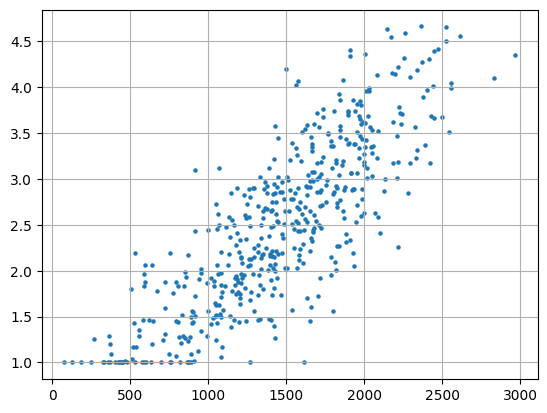

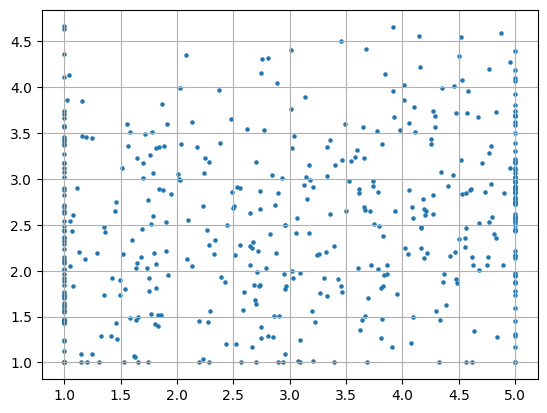

<Figure size 640x480 with 0 Axes>

In [89]:
# Vaš kôd ovdje

x0 = [grades_X[i][0] for i in range(len(grades_X))]
x1 = [grades_X[i][1] for i in range(len(grades_X))]

# print("x0: ", x0)
# print("x1: ", x1)

for x in [x0, x1]:
    plt.grid(True)
    plt.scatter(x, grades_y, s=5)
    plt.figure()

### b)

Naučite model L2-regularizirane regresije ($\lambda = 0.01$), na podacima `grades_X` i `grades_y`:

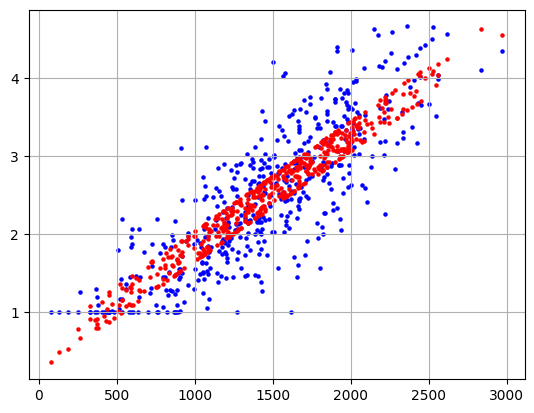

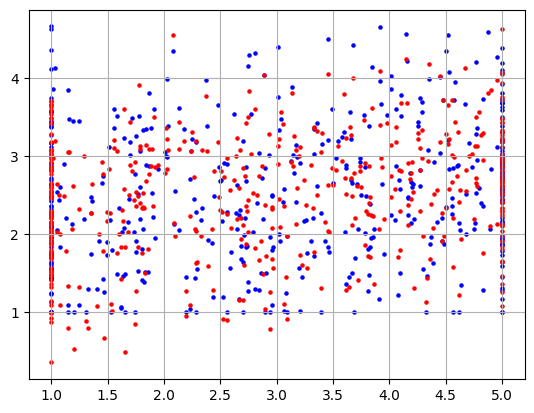

<Figure size 640x480 with 0 Axes>

In [90]:
# Vaš kôd ovdje
λ = 0.01

ϕ = PolynomialFeatures(degree=1).fit_transform(grades_X)
ridge = Ridge(alpha=λ).fit(ϕ, grades_y)
h = ridge.predict(ϕ)

for x in [x0, x1]:
    plt.grid(True)
    plt.scatter(x, grades_y, s=5, color='blue')
    plt.scatter(x, h, s=5, color='red')
    plt.figure()


Sada ponovite gornji eksperiment, ali prvo skalirajte podatke `grades_X` i `grades_y` i spremite ih u varijable `grades_X_fixed` i `grades_y_fixed`. Za tu svrhu, koristite [`StandardScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

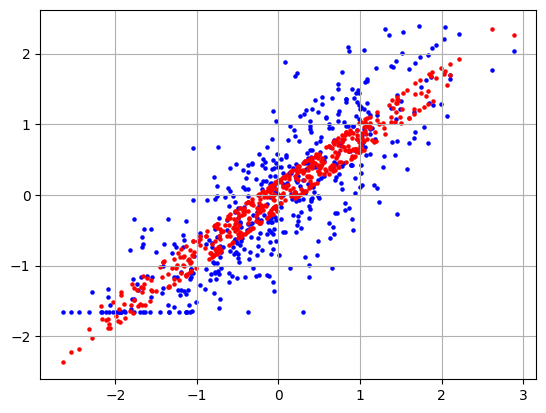

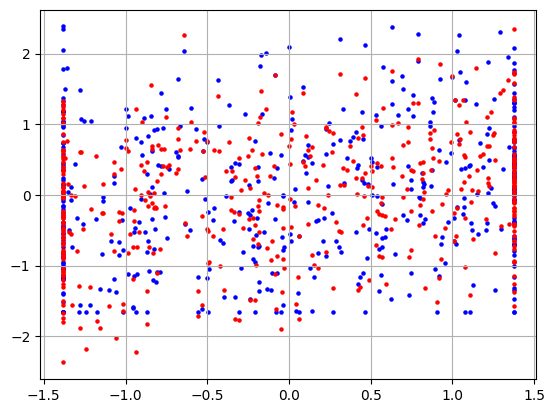

<Figure size 640x480 with 0 Axes>

In [91]:
from sklearn.preprocessing import StandardScaler
# Vaš kôd ovdje
grades_X_fixed = StandardScaler().fit_transform(grades_X)
grades_y_fixed = StandardScaler().fit_transform(grades_y.reshape(-1, 1))

x0 = [grades_X_fixed[i][0] for i in range(len(grades_X_fixed))]
x1 = [grades_X_fixed[i][1] for i in range(len(grades_X_fixed))]

# Kod iz b) dijela zadatka
λ = 0.01

ϕ = PolynomialFeatures(degree=1).fit_transform(grades_X_fixed)
ridge = Ridge(alpha=λ).fit(ϕ, grades_y_fixed)
h = ridge.predict(ϕ)

for x in [x0, x1]:
    plt.grid(True)
    plt.scatter(x, grades_y_fixed, s=5, color='blue')
    plt.scatter(x, h, s=5, color='red')
    plt.figure()


**Q:** Gledajući grafikone iz podzadatka (a), koja značajka bi trebala imati veću magnitudu, odnosno važnost pri predikciji prosjeka na studiju? Odgovaraju li težine Vašoj intuiciji? Objasnite.  

### 7. Multikolinearnost

### a)

Izradite skup podataka `grades_X_fixed_colinear` tako što ćete u skupu `grades_X_fixed` iz
zadatka *7b* duplicirati zadnji stupac (ocjenu iz srednje škole). Time smo efektivno uveli savršenu multikolinearnost.

In [92]:
# Vaš kôd ovdje
grades_X_fixed_colinear = np.insert(grades_X_fixed, 2, grades_X_fixed[:, 1], axis=1)
print(grades_X_fixed_colinear)

[[ 0.95063817 -0.78607869 -0.78607869]
 [-0.50343434 -0.50193004 -0.50193004]
 [ 1.18596832 -0.52213172 -0.52213172]
 ...
 [-0.31593552  0.80074234  0.80074234]
 [ 0.81288393  1.24783236  1.24783236]
 [-0.01938126  1.21729714  1.21729714]]


Ponovno, naučite na ovom skupu L2-regularizirani model regresije ($\lambda = 0.01$).

In [93]:
# Vaš kôd ovdje

# Kod iz 6.b) dijela zadatka
λ = 0.01

ϕ = PolynomialFeatures(degree=1).fit_transform(grades_X_fixed_colinear)
ridge = Ridge(alpha=λ).fit(ϕ, grades_y_fixed)
h = ridge.predict(ϕ)

# for x in [x0, x1]:
#     plt.grid(True)
#     plt.scatter(x, grades_y_fixed, s=5, color='blue')
#     plt.scatter(x, h, s=5, color='red')
#     plt.figure()

print("Težine w: ", ridge.coef_)

Težine w:  [[0.         0.81630364 0.07583957 0.07583957]]


**Q:** Usporedite iznose težina s onima koje ste dobili u zadatku *7b*. Što se dogodilo?

### b)

Slučajno uzorkujte 50% elemenata iz skupa `grades_X_fixed_colinear` i naučite dva modela L2-regularizirane regresije, jedan s $\lambda=0.01$ i jedan s $\lambda=1000$). Ponovite ovaj pokus 10 puta (svaki put s drugim podskupom od 50% elemenata).  Za svaki model, ispišite dobiveni vektor težina u svih 10 ponavljanja te ispišite standardnu devijaciju vrijednosti svake od težina (ukupno šest standardnih devijacija, svaka dobivena nad 10 vrijednosti).

In [97]:
# Vaš kôd ovdje
λ_arr = [0.01, 1000]
w = [[] for i in range(len(λ_arr))]

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(grades_X_fixed_colinear, grades_y_fixed, test_size=0.5)
    ϕ = PolynomialFeatures(degree=1).fit_transform(X_train)

    for i in range(len(λ_arr)):
        λ = λ_arr[i]
        w[i].append(Ridge(alpha=λ).fit(ϕ, y_train).coef_)
        print("Model {}: w: {}".format(i, w[i][-1]))       
    print()

for i in range(len(w)):
    # Zadnja 3 stupca u ispisu su standardne deviacije koje se traze u zadatku
    print("Standardne devijacije modela težina modela({}):{}".format(i, np.std(w[i], axis=0)))


Model 0: w: [[0.         0.79424319 0.06283445 0.06283445]]
Model 1: w: [[0.         0.1661588  0.02504336 0.02504336]]

Model 0: w: [[0.         0.83073937 0.09233646 0.09233646]]
Model 1: w: [[0.         0.15346291 0.0276855  0.0276855 ]]

Model 0: w: [[0.         0.79296815 0.07697122 0.07697122]]
Model 1: w: [[0.         0.17054934 0.0370389  0.0370389 ]]

Model 0: w: [[0.         0.8626284  0.07263624 0.07263624]]
Model 1: w: [[0.         0.16663979 0.03252461 0.03252461]]

Model 0: w: [[0.         0.82993274 0.06567978 0.06567978]]
Model 1: w: [[0.         0.15426785 0.02671055 0.02671055]]

Model 0: w: [[0.         0.81985703 0.06743431 0.06743431]]
Model 1: w: [[0.         0.16654394 0.02853248 0.02853248]]

Model 0: w: [[0.         0.82660477 0.06928128 0.06928128]]
Model 1: w: [[0.         0.17570988 0.02609117 0.02609117]]

Model 0: w: [[0.         0.80373679 0.07577534 0.07577534]]
Model 1: w: [[0.        0.1683615 0.0250625 0.0250625]]

Model 0: w: [[0.         0.81508565 

**Q:** Kako regularizacija utječe na stabilnost težina?  
**Q:** Jesu li koeficijenti jednakih magnituda kao u prethodnom pokusu? Objasnite zašto.